In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
from scipy.signal import find_peaks

## Direct Method

In [22]:
# Input Data
data = pd.read_excel('Data_Uts.xls')

In [23]:
data.sample(5)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
1471,14.904205,0.006944,0.009332,-0.023731
3412,34.487034,-0.026509,0.086504,0.035657
2454,24.822593,-0.022380,0.032644,-0.083287
136,1.434152,-0.014173,-0.003477,-0.055943
3960,40.016085,0.006295,-0.013693,0.016055


In [24]:
data.rename(columns={'Linear Acceleration x (m/s^2)' :'Ax',	'Linear Acceleration y (m/s^2)':'Ay'
            ,'Linear Acceleration z (m/s^2)':'Az'}, inplace=True)

In [25]:
data.sample(5)

,Time (s),Ax,Ay,Az
4105,41.477597,0.006887,-0.082051,0.070252
1928,19.512485,-0.012402,0.066707,-0.117403
5683,57.400709,-0.011206,0.049662,-0.128976
1978,20.018088,-0.020712,0.031527,-0.014769
2386,24.135875,0.021090,-0.045744,0.082695


In [26]:
#Membuat 'Time (s)' menjadi index dari data
data= data.set_index('Time (s)')
data

,Ax,Ay,Az
Time (s),,,
0.063268,0.013721,0.014204,-0.034935
0.073330,0.001679,0.008435,-0.012161
0.083392,0.027947,-0.018423,0.014612
0.093453,0.050118,-0.003807,0.038253
0.103515,0.011035,0.018267,0.073747
...,...,...,...
59.964003,0.000453,0.016277,-0.014578
59.974065,0.002317,0.053516,-0.008677
59.984127,0.022942,0.040521,0.002275


In [27]:
#Membuat variable baru untuk menyimpan data yang akan digunakan untuk Direct Method
data_direct = data

In [28]:
# Implementasi Rumus agar semua memiliki starting point yang sama 
data_direct['Ax'] = data_direct['Ax'] - (sum(data_direct['Ax'])/len(data_direct['Ax']))
data_direct['Ay'] = data_direct['Ay'] - (sum(data_direct['Ay'])/len(data_direct['Ay']))
data_direct['Az'] = data_direct['Az'] - (sum(data_direct['Az'])/len(data_direct['Az']))

In [29]:
data_direct # menampilkan data setelah melakukan rumus menyamakan starting poinnya 

,Ax,Ay,Az
Time (s),,,
0.063268,0.009157,0.005492,-0.038020
0.073330,-0.002885,-0.000278,-0.015246
0.083392,0.023383,-0.027135,0.011527
0.093453,0.045554,-0.012519,0.035168
0.103515,0.006471,0.009555,0.070662
...,...,...,...
59.964003,-0.004111,0.007565,-0.017663
59.974065,-0.002247,0.044804,-0.011762
59.984127,0.018378,0.031809,-0.000809


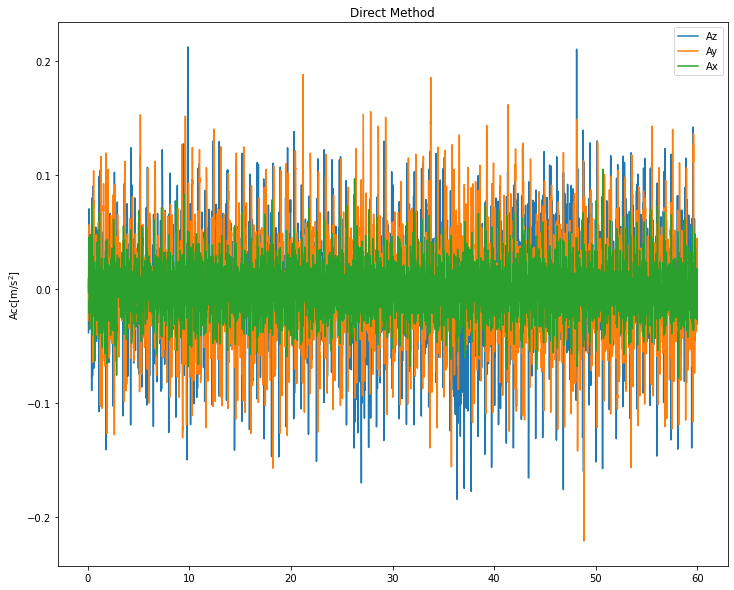

In [30]:
#Visualisasi hasil direct method
plt.figure(figsize=(12,10))
# Data column agar terliohat perbedaan dalam grafiknya dan tidak tertindih kepada data yang berlebihan
data_column = ['Az','Ay','Ax']
for col in data_column:
  plt.plot(data_direct.index,data_direct[col],label=col)
plt.title('Direct Method')
plt.ylabel('Acc[$\mathregular{m/s^{2}}$]')
plt.legend()
plt.show()

## Metode Inklinasi

In [31]:
# Memasukan data ke variable baru
data_inklinasi = data

In [32]:
# implementasi rumus sudut accelerometer 
rho = np.arctan(data_inklinasi['Az']/(np.sqrt(data_inklinasi['Ay']**2+data_inklinasi['Ax']**2)))

In [33]:
# Memasukan hasil dari implementasi rumus sudut accelerometer 
hasil_inklinasi = pd.DataFrame(rho, columns=['rho'])
hasil_inklinasi

,rho
Time (s),
0.063268,-1.297001
0.073330,-1.382955
0.083392,0.311348
0.093453,0.639915
0.103515,1.408913
...,...
59.964003,-1.117228
59.974065,-0.256427
59.984127,-0.022025


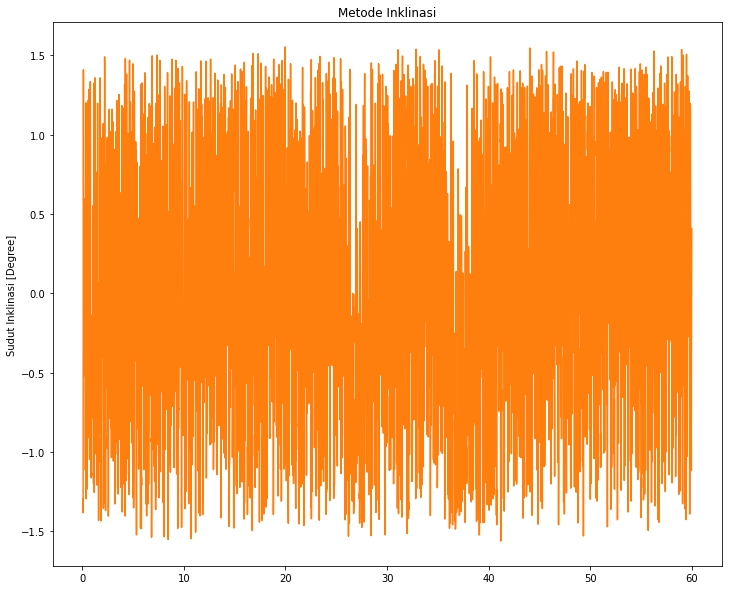

In [34]:
# Menampilkan Sudut accelemator ρ 
plt.figure(figsize=(12,10))
plt.title('Metode Inklinasi')
plt.plot(hasil_inklinasi, '#ff7f0e')
plt.ylabel('Sudut Inklinasi [Degree]')
plt.show()

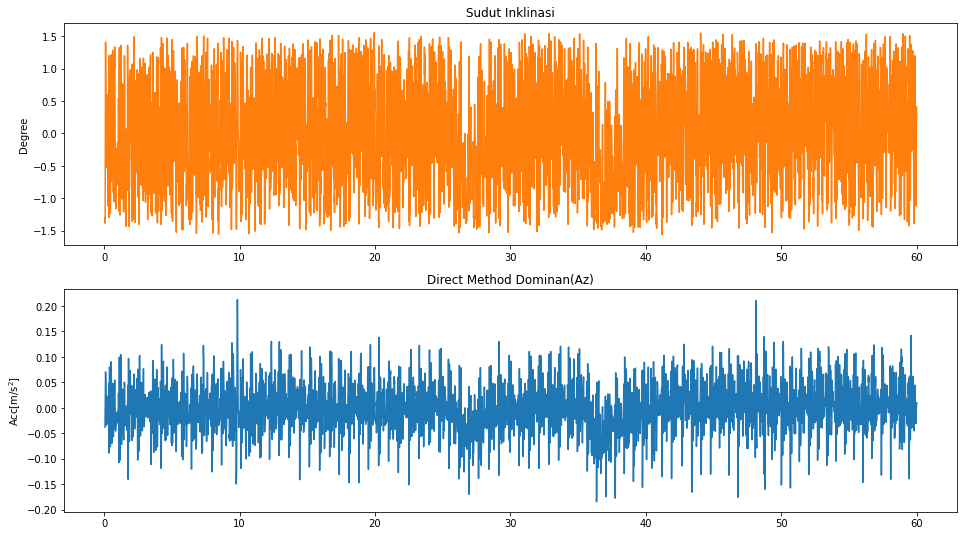

In [35]:
# Menampilkan sinyal accelerometer yang dominan sebelumnya
fig,ax = plt.subplots(2,1,figsize=(16,9))
ax[0].set_title("Sudut Inklinasi")
ax[0].plot(hasil_inklinasi, '#ff7f0e')
ax[0].set_ylabel('Degree')
ax[1].set_title("Direct Method Dominan(Az)")
ax[1].plot(data_direct['Az'])
ax[1].set_ylabel('Acc[$\mathregular{m/s^{2}}$]')
plt.show()

## LPF


In [36]:
def butter_lowpass(data,cutoff,Fs,order):
  nyq=0.5 * Fs # nilai Nyquency frequency
  normal_cutoff = cutoff/nyq
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a,data,axis=0)
  return y

In [37]:
#batasan batasan Filterisasi
T = 60.0 #pengambilan data dalam detik
Fs = 100 # Sample rate
cutoff = 0.8 
order = 5
n =  int(T* Fs) # Jumlah Sample

In [38]:
direct_lpf = butter_lowpass(data_direct['Az'],cutoff,Fs,order)
inklinasi_lpf= butter_lowpass(hasil_inklinasi['rho'], cutoff, Fs, order)

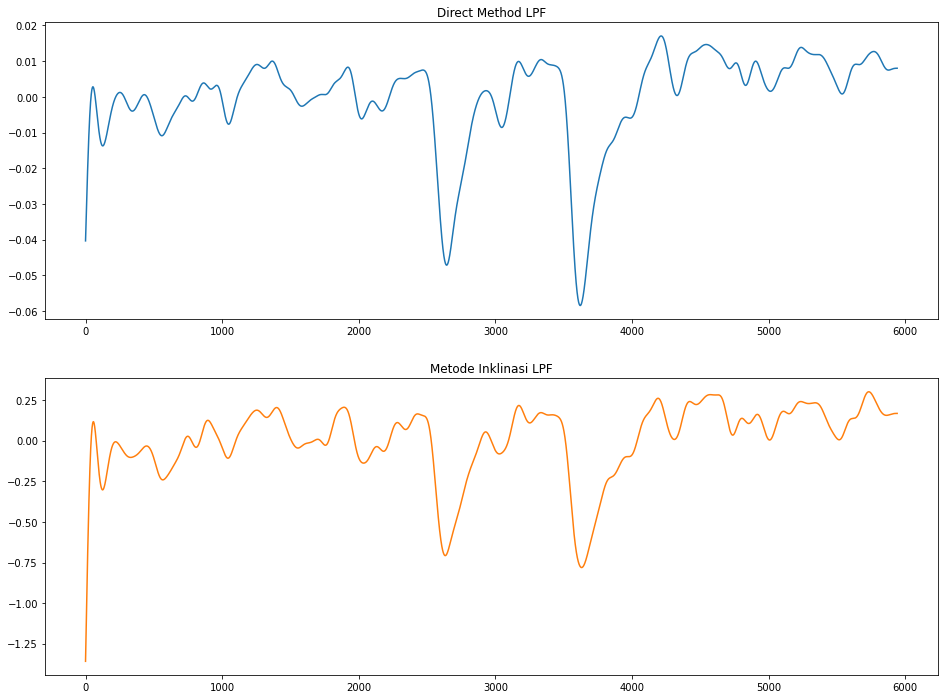

In [39]:
# Visualisasi LPF
fig,ax = plt.subplots(2,1,figsize=(16,12))
ax[0].set_title('Direct Method LPF')
ax[0].plot(direct_lpf) # Visualisasi hasil LPF direct method
ax[1].set_title('Metode Inklinasi LPF')
ax[1].plot(inklinasi_lpf,'#ff7f0e') # Visualisasi Hasil LPF metode inklinasi
plt.show()

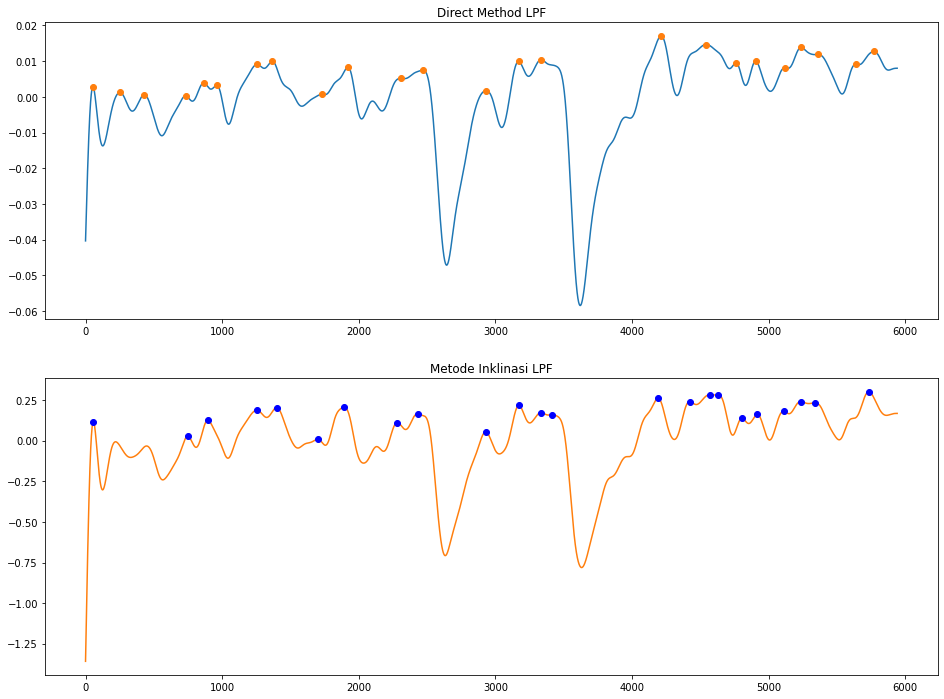

Laju Pernapasan : 24 per Menit (Menggunakna Direct Method)
Laju Pernapasan : 23 per Menit (Menggunakna Metode Inklinasi)


In [40]:
# Mendeteksi Puncak/ Peek Direct Method
peaks_direct, _ = find_peaks(direct_lpf, height=0) 
# Mendeteksi Puncak/ Peek Metode Inklinasi
peaks_inklinasi, _ = find_peaks(inklinasi_lpf, height=0)
# Visualisasi LPF dan Peek
fig,ax = plt.subplots(2,1,figsize=(16,12))
ax[0].set_title('Direct Method LPF')
ax[0].plot(direct_lpf)
ax[0].plot(peaks_direct, direct_lpf[peaks_direct], "o") #Memvisualisasikan puncak dari direct method
ax[1].set_title('Metode Inklinasi LPF')
ax[1].plot(inklinasi_lpf , '#ff7f0e')
ax[1].plot(peaks_inklinasi, inklinasi_lpf[peaks_inklinasi], "o", color='blue') #Memvisualisasikan puncak dari metode inklinasi 
plt.show()
# Jumlah Nilai Puncak Direct Method 
print(f'Laju Pernapasan : {len(peaks_direct)} per Menit (Menggunakna Direct Method)')
# Jumlah Nilai Puncak Metode Inklinasi
print(f'Laju Pernapasan : {len(peaks_inklinasi)} per Menit (Menggunakna Metode Inklinasi)')